# **Arabic text multiclass classification using Ktrain and Transformer araBERT model**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newsfeed/dataset.csv
/kaggle/input/arabic-news-texts-corpus/arabic_categorization_data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# install Ktrain library which works as wrapper of Transformers
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316979 sha256=5021576ab33778b11c0f6c45bdefe6fb82569fa6d62e76106355d9ba3d871351
  Stored in directory: /root/.cache/pip/wheels/97/cd/a7/3ef9b6abdab10d64a111bac7f6f1cc4e9ea818c478335fb394
  Created wheel for keras_bert: fil

In [4]:
import ktrain
from ktrain import text

In [68]:
df = pd.read_csv("/kaggle/input/cleaned-df/newsfeed.csv")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      4250 non-null   object
 1   category  4250 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.5+ KB


In [70]:
df.head()

,Body,category
0,الشرق اوسط سءال جواب حدث انتخاب الايرانيه اجاب...,1
1,الشرق اوسط الكونجرس امريك نتقد تصرفات حكوم الا...,1
2,الشرق اوسط خامنء رفض اعاد الانتخابات خامنء رفض...,1
3,الشرق اوسط مقتل شخص نفجار ركوك مقتل شخص اصاب ع...,1
4,الشرق اوسط دعو دور جوار صومال تدخل عسكريا رءيس...,1


In [71]:
df['category'].unique()

array([1, 2, 3, 5, 7, 4, 6])

In [72]:
class_mapping = {
    1: 'Middle East News',
    2: 'World News',
    3: 'Economy and Business',
    4: 'Sports',
    5: 'Newspaper Review',
    6: 'Science and Technology',
    7: 'Miscellaneous'
}

df['category'] = df['category'].map(class_mapping)

In [73]:
df

,Body,category
0,الشرق اوسط سءال جواب حدث انتخاب الايرانيه اجاب...,Middle East News
1,الشرق اوسط الكونجرس امريك نتقد تصرفات حكوم الا...,Middle East News
2,الشرق اوسط خامنء رفض اعاد الانتخابات خامنء رفض...,Middle East News
3,الشرق اوسط مقتل شخص نفجار ركوك مقتل شخص اصاب ع...,Middle East News
4,الشرق اوسط دعو دور جوار صومال تدخل عسكريا رءيس...,Middle East News
...,...,...
4245,منوعات جاكس حصد ملاي رحيله مايكل جاكس حطم ارقا...,Science and Technology
4246,منوعات مدي اقع ولانسك جديد الشبح فيلم الشبح في...,Science and Technology
4247,منوعات رحيل ممثل امريك روبرت ولب الممثل امريك ...,Science and Technology
4248,منوعات الشرط بحث قاتل شيرل اسي الشرطه بريطان ع...,Science and Technology


In [74]:
df['category'].unique()

array(['Middle East News', 'World News', 'Economy and Business',
       'Newspaper Review', 'Miscellaneous', 'Sports',
       'Science and Technology'], dtype=object)

In [77]:
#Checking for GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Tue Apr 30 10:47:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|===============================

In [78]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test , y_train,y_test = train_test_split(np.array(df['Body']),np.array(df['category']),test_size=0.2, random_state=0)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (3400,)
Shape of y_train: (3400,)
Shape of X_test: (850,)
Shape of y_test: (850,)


In [80]:
MODEL_NAME = 'aubmindlab/bert-base-arabertv01'

In [81]:
t = text.Transformer(MODEL_NAME, maxlen=128)
train = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier(metrics=['accuracy'])
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.fit_onecycle(5e-5,10)

preprocessing train...
language: ar
train sequence lengths:
	mean : 290
	95percentile : 575
	99percentile : 835


Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 279
	95percentile : 520
	99percentile : 733




begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
107/107 [==============================] - 73s 538ms/step - loss: 0.7516 - accuracy: 0.7874 - val_loss: 0.1345 - val_accuracy: 0.9918
Epoch 2/10
107/107 [==============================] - 55s 513ms/step - loss: 0.0800 - accuracy: 0.9959 - val_loss: 0.0444 - val_accuracy: 0.9953
Epoch 3/10
107/107 [==============================] - 56s 514ms/step - loss: 0.0399 - accuracy: 0.9965 - val_loss: 0.0359 - val_accuracy: 0.9953
Epoch 4/10
107/107 [==============================] - 56s 515ms/step - loss: 0.0322 - accuracy: 0.9965 - val_loss: 0.0340 - val_accuracy: 0.9953
Epoch 5/10
107/107 [==============================] - 56s 514ms/step - loss: 0.0367 - accuracy: 0.9944 - val_loss: 0.0423 - val_accuracy: 0.9941
Epoch 6/10
107/107 [==============================] - 56s 514ms/step - loss: 0.0562 - accuracy: 0.9865 - val_loss: 0.0449 - val_accuracy: 0.9941
Epoch 7/10
107/107 [==============================] - 56s 514ms/ste

In [84]:
validation = learner.validate(class_names=t.get_classes())
validation

                        precision    recall  f1-score   support

  Economy and Business       1.00      1.00      1.00        58
      Middle East News       1.00      1.00      1.00       429
         Miscellaneous       1.00      1.00      1.00         5
      Newspaper Review       1.00      1.00      1.00        33
Science and Technology       1.00      0.92      0.96        13
                Sports       0.96      1.00      0.98        52
            World News       1.00      0.99      0.99       260

              accuracy                           1.00       850
             macro avg       0.99      0.99      0.99       850
          weighted avg       1.00      1.00      1.00       850



array([[ 58,   0,   0,   0,   0,   0,   0],
       [  0, 429,   0,   0,   0,   0,   0],
       [  0,   0,   5,   0,   0,   0,   0],
       [  0,   0,   0,  33,   0,   0,   0],
       [  0,   0,   0,   0,  12,   1,   0],
       [  0,   0,   0,   0,   0,  52,   0],
       [  0,   2,   0,   0,   0,   1, 257]])

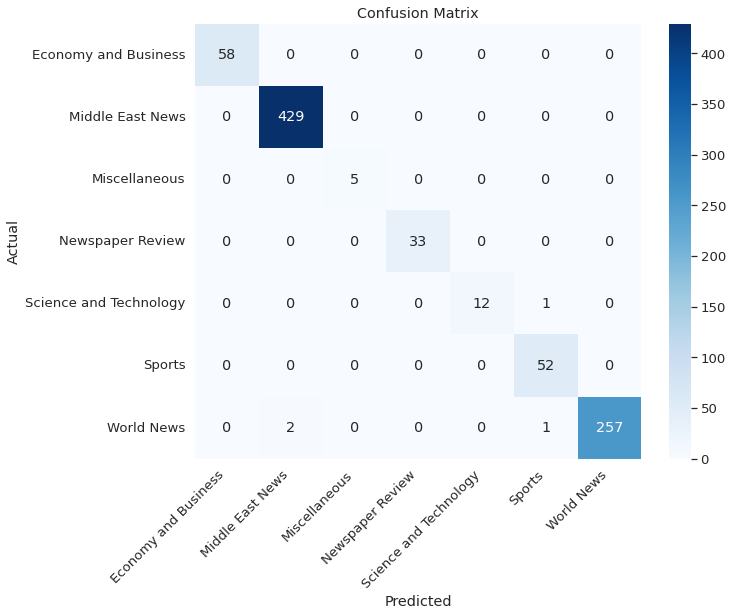

In [87]:
# Confusion matrix data
conf_matrix = np.array([[58, 0, 0, 0, 0, 0, 0],
                        [0, 429, 0, 0, 0, 0, 0],
                        [0, 0, 5, 0, 0, 0, 0],
                        [0, 0, 0, 33, 0, 0, 0],
                        [0, 0, 0, 0, 12, 1, 0],
                        [0, 0, 0, 0, 0, 52, 0],
                        [0, 2, 0, 0, 0, 1, 257]])

# Class names
class_names = ['Economy and Business', 'Middle East News', 'Miscellaneous', 
               'Newspaper Review', 'Science and Technology', 'Sports', 'World News']

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()